### Requests 사용법

In [148]:
### 불러오기
#서버에 페이지 정보를 요청할 때 사용
import requests as req

In [149]:
### 코드 한줄이 리퀘스트 리스폰스 모두를 발동시킨다  200코드 나옴
res=req.get('https://www.naver.com/')   

In [150]:
### 응답안되는 사례를 보여준다.  406에러
req.get('https://www.melon.com/')
# 406 : 요청실패

<Response [406]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
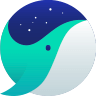
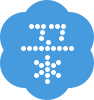

In [151]:
res.text

### BeautifulSoup 사용
-- 내가 원하는 내용만 추출

In [152]:
# !pip install beautifulsoup4

In [153]:
### 뷰티플 스프 불러오기
from bs4 import BeautifulSoup as bs

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
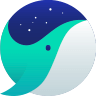
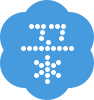

In [154]:
# bs(파싱할 데이터,파싱방법 )    
### 데이터를 바꿔주는것을 파싱이라고도 부른다.   lxml 방식이 가장 빠르게 파싱된다고한다. 
### 방법은 달라도 결과물은 같다고 한다 
soup= bs(res.text,'lxml')
soup

In [155]:
###    'a' 모든 a태그를 가져온 것이다.   'a.nav' 클래스가 nav이면서 a태그  
##### 셀렉터 지정만 잘하면 soup의 대부분이 끝이라고 한다. 
soup.select('a.nav')[2].text

'블로그'

In [156]:
result= soup.select('a.nav')

In [157]:
  ### 가져온 데이터를 리스트 타입 변수에 담아둔다
li = []

for i in result:
    ##print(i.text)
    li.append(i.text)

In [158]:
res1=req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8')
soup1=bs(res1.text,'lxml' )

In [159]:
result1=soup1.select('div.temperature_text > strong')[0].text

In [160]:
result1

'현재 온도20.0°'

In [161]:
### 이것도 가능 
soup1.select('strong')[10].text

'현재 온도20.0°'

### 태그 제거

In [162]:
span =soup1.select('div.temperature_text > strong >span') ### 지우고 싶은 태그이다 div의 자식인 스트롱의 자식인 span

In [163]:
for i in span:
    i.extract()

In [164]:
soup1.select('div.temperature_text > strong' )  ### span태그 삭제된 상태  ### 지우고싶은 태그를 명확하게 짚어야한다

[<strong>20.0</strong>,
 <strong>12</strong>,
 <strong>24</strong>,
 <strong>14</strong>,
 <strong>26</strong>]

### 멜론페이지 가져오기

In [165]:
### 보안 때문에 406 코드가 나오는 상태이다 
##### headers 값에 정상적으로 접속했을때 나오는 내용을 넣어서 들어간다
url='https://www.melon.com/'
res=req.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36' })
soup=bs(res.text,'lxml')
print(res)

<Response [200]>


In [166]:
url2='https://www.melon.com/chart/index.htm'
res2=req.get(url2,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36' })
soup2=bs(res2.text,'lxml')
print(res2)


<Response [200]>


In [170]:
##result2=soup2.select('span > a')[0].text
f=soup2.select('div.rank01>span>a')

In [168]:
len(f)

100

In [171]:
for i in f:
    print(i.text)
    ###print(i.text.strip() ) ### 스트립함수를 넣으면 각종 부호들을 삭제해준다. rank1까지만 넣고싶을때 사용
    

That That (prod. & feat. SUGA of BTS)
봄여름가을겨울 (Still Life)
LOVE DIVE
TOMBOY
사랑인가 봐
사랑은 늘 도망가
Feel My Rhythm
우리들의 블루스
LOVE me
GANADARA (Feat. 아이유)
다시 만날 수 있을까
취중고백
정이라고 하자 (Feat. 10CM)
ZOOM
INVU
이제 나만 믿어요
나의 X에게
듣고 싶을까
무지개
신호등
아버지
ELEVEN
다정히 내 이름을 부르면
손이 참 곱던 그대
A bientot
사랑해 진짜
연애편지
MY BAG
사랑역
인생찬가
STAY
보금자리
사랑해요 그대를
SMILEY (Feat. BIBI)
언제나 사랑해
Seoul
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
너를 생각해
RUN2U
That's Hilarious
Next Level
Dynamite
Celeb
드라마
Weekend
리무진 (Feat. MINO) (Prod. GRAY)
strawberry moon
Butter
With you
FEARLESS
아무래도 난
Permission to Dance
존재만으로
Step Back
라일락
내 손을 잡아
호랑수월가
너의 모든 순간
눈이 오잖아(Feat.헤이즈)
Counting Stars (Feat. Beenzino)
바라만 본다
내가 아니라도
봄날
OHAYO MY NIGHT
스물다섯, 스물하나
사랑인걸
Savage
Celebrity
Bad Habits
My Universe
너, 너 (N번째 연애 X 휘인 (Whee In))
밤하늘의 별을(2020)
Real Love
Blueming
찰나가 영원이 될 때 (The Eternal Moment)
문득
모든 날, 모든 순간 (Every day, Every Moment)
어제처럼
고백
abcdefu
Dreams Come True
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)
Off My Face
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) 